导体、绝缘体、半导体的band_structure

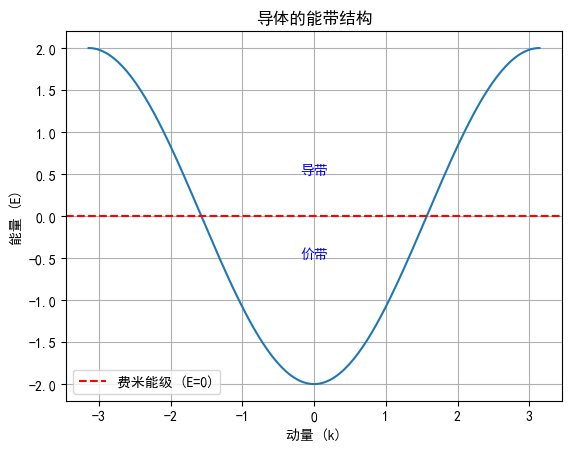

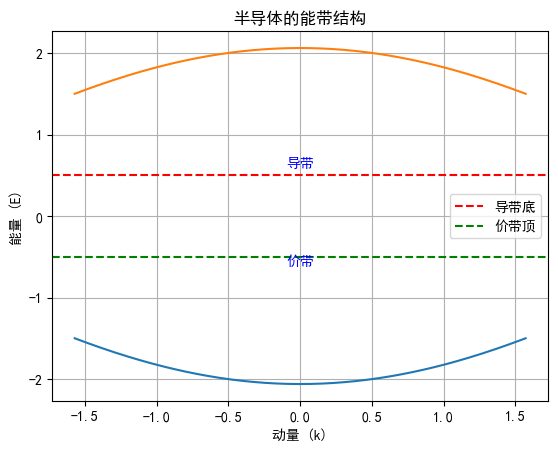

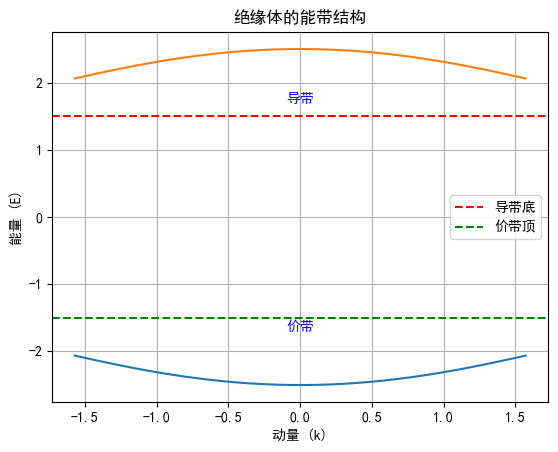

In [5]:
import kwant
import matplotlib.pyplot as plt
import numpy as np

# 配置 matplotlib 使用支持中文字符的字体
# Add a list of sans-serif fonts that might support Chinese characters.
# Matplotlib will try to use these fonts in order.
plt.rcParams['font.sans-serif'] = ['SimHei', 'WenQuanYi Zen Hei', 'Arial Unicode MS', 'DejaVu Sans', 'sans-serif']
# 解决负号 '-' 显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

# 定义一个1D链晶格
lat = kwant.lattice.chain(a=1)

# --- 导体模型 ---
def make_conductor():
    sys = kwant.Builder(kwant.TranslationalSymmetry((1,)))
    sys[lat(0)] = 0.0
    hopping = kwant.builder.HoppingKind((1,), lat, lat)
    sys[hopping] = -1.0
    return sys.finalized()

conductor_sys = make_conductor()
momenta_conductor = np.linspace(-np.pi, np.pi, 200)
bands_conductor = kwant.physics.Bands(conductor_sys)
energies_conductor = np.vstack([bands_conductor(k) for k in momenta_conductor])

plt.figure()
plt.plot(momenta_conductor, energies_conductor)
plt.xlabel("动量 (k)")
plt.ylabel("能量 (E)")
plt.title("导体的能带结构")
plt.grid(True)
plt.axhline(0, color='red', linestyle='--', label='费米能级 (E=0)')
plt.text(0, 0.5, '导带', color='blue', ha='center')
plt.text(0, -0.5, '价带', color='blue', ha='center')
plt.legend()
plt.show()

# --- 半导体模型 ---
def make_semiconductor(delta=0.5):
    sys = kwant.Builder(kwant.TranslationalSymmetry((2,)))
    sys[lat(0)] = -delta
    sys[lat(1)] = delta
    hopping = kwant.builder.HoppingKind((1,), lat, lat)
    sys[hopping] = -1.0
    return sys.finalized()

semiconductor_sys = make_semiconductor(delta=0.5)
momenta_semiconductor = np.linspace(-np.pi/2, np.pi/2, 200)
bands_semiconductor = kwant.physics.Bands(semiconductor_sys)
energies_semiconductor = np.vstack([bands_semiconductor(k) for k in momenta_semiconductor])

plt.figure()
plt.plot(momenta_semiconductor, energies_semiconductor)
plt.xlabel("动量 (k)")
plt.ylabel("能量 (E)")
plt.title("半导体的能带结构")
plt.grid(True)
band_gap_semiconductor = 2 * 0.5
plt.axhline(band_gap_semiconductor/2, color='red', linestyle='--', label='导带底')
plt.axhline(-band_gap_semiconductor/2, color='green', linestyle='--', label='价带顶')
plt.text(0, band_gap_semiconductor/2 + 0.1, '导带', color='blue', ha='center')
plt.text(0, -band_gap_semiconductor/2 - 0.1, '价带', color='blue', ha='center')
plt.legend()
plt.show()

# --- 绝缘体模型 ---
def make_insulator(delta=1.5):
    sys = kwant.Builder(kwant.TranslationalSymmetry((2,)))
    sys[lat(0)] = -delta
    sys[lat(1)] = delta
    hopping = kwant.builder.HoppingKind((1,), lat, lat)
    sys[hopping] = -1.0
    return sys.finalized()

insulator_sys = make_insulator(delta=1.5)
momenta_insulator = np.linspace(-np.pi/2, np.pi/2, 200)
bands_insulator = kwant.physics.Bands(insulator_sys)
energies_insulator = np.vstack([bands_insulator(k) for k in momenta_insulator])

plt.figure()
plt.plot(momenta_insulator, energies_insulator)
plt.xlabel("动量 (k)")
plt.ylabel("能量 (E)")
plt.title("绝缘体的能带结构")
plt.grid(True)
band_gap_insulator = 2 * 1.5
plt.axhline(band_gap_insulator/2, color='red', linestyle='--', label='导带底')
plt.axhline(-band_gap_insulator/2, color='green', linestyle='--', label='价带顶')
plt.text(0, band_gap_insulator/2 + 0.2, '导带', color='blue', ha='center')
plt.text(0, -band_gap_insulator/2 - 0.2, '价带', color='blue', ha='center')
plt.legend()
plt.show()